<a href="https://colab.research.google.com/github/ShadyGirgis79/Loan-Prediction-Project/blob/main/Loan_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

from google.colab import files
#uploaded = files.upload()

#Read "Train data"

In [ ]:
loan = pd.read_csv("Train data.csv")

print(loan.shape)
loan.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#Changing String Values to Numerical Values

In [ ]:
loan['Gender'] = loan['Gender'].map({'Male':1 ,'Female':0})
loan['Married'] = loan['Married'].map({'Yes':1 , 'No':0})
loan['Dependents'] = loan['Dependents'].map({'0':0 , '1':1 , '2':2 , '3+':3})
loan['Education'] = loan['Education'].map({'Graduate':1 ,'Not Graduate':0 })
loan['Self_Employed'] = loan['Self_Employed'].map({'Yes':1 , 'No':0})
loan['Property_Area'] = loan['Property_Area'].map({'Rural':1 ,'Urban':2 ,'Semiurban':3})
loan['Loan_Status'] = loan['Loan_Status'].map({'Y':1 , 'N':0})

loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
loan.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,2.087948,0.687296
std,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.815081,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,3.000000,1.000000


# Solving Missing Values

In [ ]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Using mean to substitute missing values

In [ ]:
loan['Gender'] = loan['Gender'].fillna(loan['Gender'].mean())
loan['Married'] = loan['Married'].fillna(loan['Married'].mean())
loan['Dependents'] = loan['Dependents'].fillna(loan['Dependents'].mean())
loan['Self_Employed'] = loan['Self_Employed'].fillna(loan['Self_Employed'].mean())
loan['LoanAmount'] = loan['LoanAmount'].fillna(loan['LoanAmount'].mean())
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean())
loan['Credit_History'] = loan['Credit_History'].fillna(loan['Credit_History'].mean())

loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


#Data Normalization for Nominal Data Columns

In [ ]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns using Min-Max normalization
loan[numerical_columns] = scaler.fit_transform(loan[numerical_columns])

# Now loan_data contains the normalized values in the LoanAmount and Income columns
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,0.070489,0.000000,0.198860,0.74359,1.0,0.5,1
1,LP001003,1.0,1.0,1.0,1,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,0.035250,0.000000,0.082489,0.74359,1.0,0.5,1
3,LP001006,1.0,1.0,0.0,0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,0.5,1
4,LP001008,1.0,0.0,0.0,1,0.0,0.072356,0.000000,0.191027,0.74359,1.0,0.5,1


Remove Loan_ID column

In [ ]:
loan = loan.drop(['Loan_ID'] , axis=1)

print(loan.shape)
loan.head()

(614, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,0.070489,0.000000,0.198860,0.74359,1.0,0.5,1
1,1.0,1.0,1.0,1,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0
2,1.0,1.0,0.0,1,1.0,0.035250,0.000000,0.082489,0.74359,1.0,0.5,1
3,1.0,1.0,0.0,0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,0.5,1
4,1.0,0.0,0.0,1,0.0,0.072356,0.000000,0.191027,0.74359,1.0,0.5,1


#Detecting & Removing rows containing outliers using the z-score method

In [ ]:
#Calculate the mean and standard deviation for each column
loan_means = np.mean(loan, axis=0)
loan_std_devs = np.std(loan, axis=0)

#Calculate the z-score for each cell based on its column
z_scores_loan = (loan - loan_means) / loan_std_devs

#Define a threshold for outliers (e.g., ±3 standard deviations)
threshold = 3

#Identify outliers
outliers_loan = np.abs(z_scores_loan) > threshold

print(z_scores_loan.shape)
z_scores_loan.head()

(614, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.483728,-1.370299,-0.761490,0.528362,-0.415953,0.072991,-0.554487,0.000000,0.279851,0.45164,-0.107989,0.674519
1,0.483728,0.733351,0.236612,0.528362,-0.415953,-0.134412,-0.038732,-0.219273,0.279851,0.45164,-1.335861,-1.482537
2,0.483728,0.733351,-0.761490,0.528362,2.536301,-0.393747,-0.554487,-0.957641,0.279851,0.45164,-0.107989,0.674519
3,0.483728,0.733351,-0.761490,-1.892641,-0.415953,-0.462062,0.251980,-0.314547,0.279851,0.45164,-0.107989,0.674519
4,0.483728,-1.370299,-0.761490,0.528362,-0.415953,0.097728,-0.554487,-0.064454,0.279851,0.45164,-0.107989,0.674519


In [ ]:
#Remove rows containing outliers
loan_cleaned = loan[~np.any(outliers_loan, axis=1)]

print(loan_cleaned.shape)
loan_cleaned.head()

(577, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,0.070489,0.000000,0.198860,0.74359,1.0,0.5,1
1,1.0,1.0,1.0,1,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0
2,1.0,1.0,0.0,1,1.0,0.035250,0.000000,0.082489,0.74359,1.0,0.5,1
3,1.0,1.0,0.0,0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,0.5,1
4,1.0,0.0,0.0,1,0.0,0.072356,0.000000,0.191027,0.74359,1.0,0.5,1


#detecting Outliers Using IQR

In [ ]:
# Calculate quartiles
q1_loan = np.percentile(loan, 25, axis=0)  # 25th percentile (Q1) for each column
q3_loan = np.percentile(loan, 75, axis=0)  # 75th percentile (Q3) for each column

# Calculate Interquartile Range (IQR)
iqr_loan = q3_loan - q1_loan

# Define outlier thresholds (1.5 IQR above Q3 and below Q1)
upper_bound = q3_loan + 1.5 * iqr_loan
lower_bound = q1_loan - 1.5 * iqr_loan

# Identify outliers based on IQR thresholds
outliers_iqr_loan = (loan < lower_bound) | (loan > upper_bound)

# Count rows with outliers
rows_with_outliers = np.sum(outliers_iqr_loan, axis=1)  # Sum outliers across columns for each row

# Count the number of rows containing at least one outlier
num_outlier_rows = np.count_nonzero(rows_with_outliers)

print("Number of rows containing outliers:", num_outlier_rows)

Number of rows containing outliers: 439


#Correlation matrix (correlation calculated between each two columns)
Most Effective feature on the output is the **Credit_History**, it has correlation with the output 0.56

In [ ]:
#exclude output column
feature_columns = loan_cleaned

#Calculate the correlation matrix
corr_matrix = feature_columns.corr()

#Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

Here we can conclude that the best correlation is between Loan Amount and Application Income

In [ ]:
loan = pd.DataFrame(loan_cleaned)
print(loan.shape)
loan.head()

#Train Test Split data

In [ ]:
X = loan.drop(['Loan_Status'] , axis = 1)
Y = loan['Loan_Status']

x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,random_state=0)

# Using K-Nearest Neighbour(KNN)

In [ ]:
k_values = range(1, 11)
errors = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  knn_pred = knn.predict(x_test)
  error = 1 - accuracy_score(y_test, knn_pred)
  errors.append(error)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': knn_pred}).head()

In [ ]:
# Plot the elbow curve
plt.plot(k_values, errors)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Curve for KNN')
plt.show()

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, knn_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Calculating accuracy score for KNN, K=8 used because it gives the least possible error rate

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("Accuracy:", knn_acc)

Confusion Matrix

In [ ]:
import seaborn as sb
cr=confusion_matrix(y_test, knn_pred)
cr=pd.DataFrame(cr)
cr.columns = ['NoLoan','Loan']
cr.index= ['NoLoan','Loan']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

# Logistic Regression

In [ ]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

In [ ]:
log_pred = log_model.predict(x_test)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': log_pred}).head()

Calculating accuracy score for Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score

reg_acc = accuracy_score(y_test,log_pred)

print("Accuracy:", reg_acc)

Confusion Matrix

In [ ]:
import seaborn as sb
cr=confusion_matrix(y_test, log_pred)
cr=pd.DataFrame(cr)
cr.columns = ['NoLoan','Loan']
cr.index= ['NoLoan','Loan']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

#Naïve Bayes Classifier

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

In [ ]:
nb_pred = nb_classifier.predict(x_test)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': nb_pred}).head()

In [ ]:
nb_acc = accuracy_score(y_test, nb_pred)

print("Accuracy:", nb_acc)

Confusion Matrix

In [ ]:
import seaborn as sb
cr=confusion_matrix(y_test, nb_pred)
cr=pd.DataFrame(cr)
cr.columns = ['NoLoan','Loan']
cr.index= ['NoLoan','Loan']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

#MLP Classifier

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
mlp_classifier = MLPClassifier(random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)

In [ ]:
mlp_pred = mlp_classifier.predict(X_test_scaled)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': mlp_pred}).head()

In [ ]:
mlp_acc = accuracy_score(y_test, mlp_pred)
print("Accuracy:", mlp_acc)

Confusion Matrix

In [ ]:
import seaborn as sb
cr=confusion_matrix(y_test, mlp_pred)
cr=pd.DataFrame(cr)
cr.columns = ['NoLoan','Loan']
cr.index= ['NoLoan','Loan']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

#SVM classifier

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

In [ ]:
svc_pred = svm_classifier.predict(X_test_scaled)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': svc_pred}).head()

In [ ]:
svc_acc = accuracy_score(y_test, svc_pred)
print("Accuracy:", svc_acc)

Confusion Matrix

In [ ]:
import seaborn as sb
cr=confusion_matrix(y_test, svc_pred)
cr=pd.DataFrame(cr)
cr.columns = ['NoLoan' ,'Loan']
cr.index=['NoLoan' ,'Loan']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

#Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(x_train, y_train)

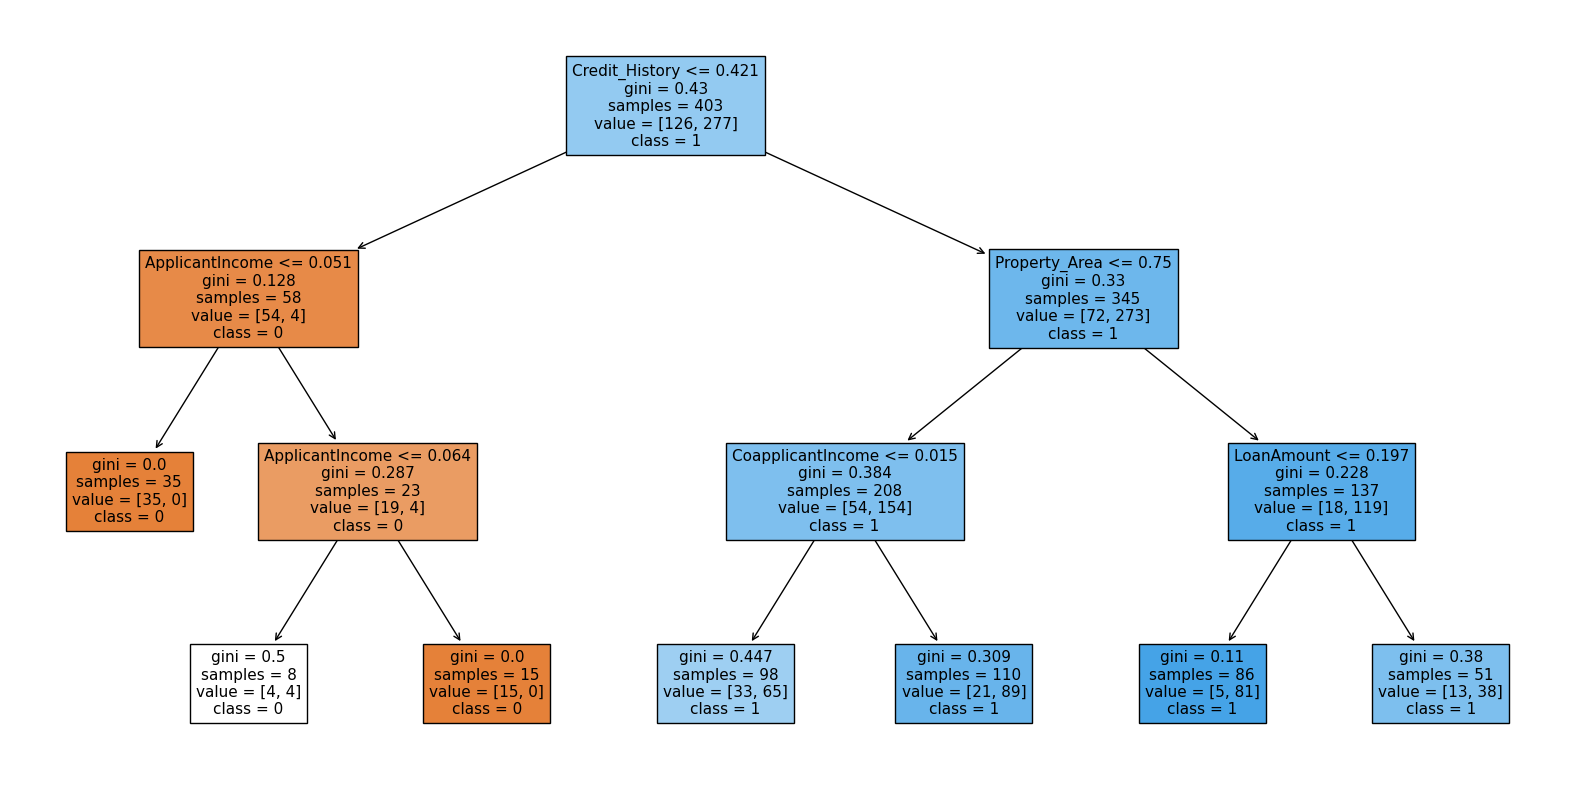

In [ ]:
from sklearn import tree
# Convert feature names to strings
feature_names_str = [str(feature) for feature in X.columns]

# Convert class names to strings
class_names_str = [str(class_) for class_ in decision_tree.classes_]

# Plot the decision tree with string names
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree, feature_names=feature_names_str, class_names=class_names_str, filled=True)
plt.show()

In [ ]:
dt_pred = decision_tree.predict(x_test)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': dt_pred}).head()

,Test values,Predict
170,1,1
452,0,0
277,1,1
518,0,1
352,1,1


In [ ]:
dt_acc = accuracy_score(y_test, dt_pred)
print("Accuracy:", dt_acc)

Accuracy: 0.8333333333333334


Confusion Matrix

<Axes: >

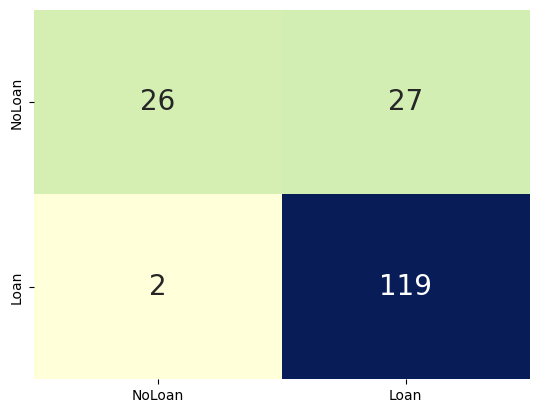

In [ ]:
import seaborn as sb
cr=confusion_matrix(y_test, dt_pred)
cr=pd.DataFrame(cr)
cr.columns = ['NoLoan' ,'Loan']
cr.index=['NoLoan' ,'Loan']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

#Accuracies

In [ ]:
print("Method\t\t\tAccuracy")
print("=================================")
print("KNN\t\t\t", round(knn_acc*100 , 2),"%")
print("---------------------------------")
print("Logistic Regression\t", round(reg_acc*100, 2),"%")
print("---------------------------------")
print("Naive Bayes\t\t", round(nb_acc*100, 2), "%")
print("---------------------------------")
print("MLP\t\t\t", round(mlp_acc*100, 2), "%")
print("---------------------------------")
print("SVM\t\t\t", round(svc_acc*100, 2), "%")
print("---------------------------------")
print("Decision Tree\t\t", round(dt_acc*100, 2), "%")


Method			Accuracy
KNN			 81.61 %
---------------------------------
Logistic Regression	 82.76 %
---------------------------------
Naive Bayes		 81.03 %
---------------------------------
MLP			 81.61 %
---------------------------------
SVM			 83.91 %
---------------------------------
Decision Tree		 83.33 %


#Read "New Customer"

In [ ]:
from google.colab import files
#uploaded = files.upload()

In [ ]:
customer = pd.read_csv("New Customer.csv")

print(customer.shape)
customer.head()

(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Remove Loan_ID column

In [ ]:
customer = customer.drop(['Loan_ID'] , axis=1)
customer.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#Data Normalization for Nominal Data Columns

In [ ]:
customer['Gender'] = customer['Gender'].map({'Male':1 ,'Female':0})
customer['Married'] = customer['Married'].map({'Yes':1 , 'No':0})
customer['Dependents'] = customer['Dependents'].map({'0':0 , '1':1 , '2':2 , '3+':3})
customer['Education'] = customer['Education'].map({'Graduate':1 ,'Not Graduate':0 })
customer['Self_Employed'] = customer['Self_Employed'].map({'Yes':1 , 'No':0})
customer['Property_Area'] = customer['Property_Area'].map({'Rural':1 ,'Urban':2 ,'Semiurban':3})


customer.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,2
1,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,2
2,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,2
3,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,NaN,2
4,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,2


Statistics on Data

In [ ]:
customer.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,356.000000,367.000000,357.000000,367.000000,344.000000,367.000000,367.000000,362.000000,361.000000,338.000000,367.000000
mean,0.803371,0.634877,0.829132,0.771117,0.107558,4805.599455,1569.577657,136.132597,342.537396,0.825444,2.013624
std,0.398009,0.482122,1.071302,0.420687,0.310273,4910.685399,2334.232099,61.366652,65.156643,0.380150,0.787421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2864.000000,0.000000,100.250000,360.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000,2.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5060.000000,2430.500000,158.000000,360.000000,1.000000,3.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000,3.000000


#Solving Missing Values

Detecting number of missing values in each column

In [ ]:
customer.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Using mean to substitute missing values

In [ ]:
customer['Gender'] = customer['Gender'].fillna(customer['Gender'].mean())
customer['Dependents'] = customer['Dependents'].fillna(customer['Dependents'].mean())
customer['Self_Employed'] = customer['Self_Employed'].fillna(customer['Self_Employed'].mean())
customer['LoanAmount'] = customer['LoanAmount'].fillna(customer['LoanAmount'].mean())
customer['Loan_Amount_Term'] = customer['Loan_Amount_Term'].fillna(customer['Loan_Amount_Term'].mean())
customer['Credit_History'] = customer['Credit_History'].fillna(customer['Credit_History'].mean())

customer.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Now, data is ready for prediction

In [ ]:
customer.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.000000,2
1,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.000000,2
2,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.000000,2
3,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,0.825444,2
4,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.000000,2


Creating a dataframe with the data

In [ ]:
customer_log = pd.DataFrame(customer)
print(customer_log.shape)
customer_log.head()

(367, 11)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.000000,2
1,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.000000,2
2,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.000000,2
3,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,0.825444,2
4,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.000000,2


#SVM Prediction

In [ ]:
customer_svc = pd.DataFrame(customer)
svc_predicted_customer = svm_classifier.predict(customer_svc)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
customer_svc['Predicted_Loan_Status'] = svc_predicted_customer
print(customer_svc.shape)
customer_svc.head()
svc_predicted_customer[:20]

(367, 12)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

First 20 predicted labels

#Decision Tree Prediction

In [ ]:
customer_decTree = pd.DataFrame(customer)
decTree_predicted_customer = decision_tree.predict(customer_decTree)

In [ ]:
customer_decTree['Predicted_Loan_Status'] = decTree_predicted_customer
print(customer_decTree.shape)
customer_decTree.head()

(367, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
0,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.000000,2,1
1,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.000000,2,1
2,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.000000,2,1
3,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,0.825444,2,1
4,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.000000,2,1


In [ ]:
# Calculate the histogram bins and counts
counts, bins = np.histogram(decTree_predicted_customer)

# Create the histogram plot using Matplotlib
plt.bar(bins[:-1], counts, width=2*(bins[1] - bins[0]))  # Adjust width for bin spacing

# Set labels and title
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Histogram of Binary Array")

# Optional: Add grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()

# Print the first 20 elements of the decTree_predicted_customer array
decTree_predicted_customer[:20]

#Logistic Regression Prediction

In [ ]:
predicted_customer = log_model.predict(customer_log)
customer_log['Predicted_Loan_Status'] = predicted_customer
print(customer_log.shape)
customer_log.head()

predicted_customer[:20]

first 20 predicted labels

#MLP Prediction

In [ ]:
customer_mlp = pd.DataFrame(customer)
mlp_predicted_customer = mlp_classifier.predict(customer_mlp)

In [ ]:
customer_mlp['Predicted_Loan_Status'] = mlp_predicted_customer
print(customer_mlp.shape)
customer_mlp.head()

mlp_predicted_customer[:20]

#KNN Prediction

In [ ]:
customer_knn = pd.DataFrame(customer)
knn_predicted_customer = knn.predict(customer_knn)

In [ ]:
customer_knn['Predicted_Loan_Status'] = knn_predicted_customer
print(customer_knn.shape)
customer_knn.head()

knn_predicted_customer[:20]

#Naive Bayes Prediction

In [ ]:
customer_nb = pd.DataFrame(customer)
nb_predicted_customer = nb_classifier.predict(customer_nb)

In [ ]:
customer_nb['Predicted_Loan_Status'] = nb_predicted_customer
print(customer_nb.shape)
customer_nb.head()

nb_predicted_customer[:20]

# Filter the dataset for married individuals in the semiurban area who obtained the loan

In [ ]:
MSL = customer_log[(customer_log['Married'] == 1)
              &(customer_log['Property_Area'] == 3)
              &(customer_log['Predicted_Loan_Status'] == 1)]

print(MSL.shape)
MSL.head()

In [ ]:
total_married_semiurban = customer_log[(customer_log['Married'] == 1) & (customer_log['Property_Area'] == 3)]

print(total_married_semiurban.shape)
total_married_semiurban.head()

#Calculate the percentage

In [ ]:
percentage = len(MSL) / len(total_married_semiurban) * 100

print(f"Percentage of married people in semiurban area that obtained the loan: {percentage:.2f}%")